## Topic : Basics of 3D Geological Modelling using GemPy

## Prepared by : Manit Zaveri

## Presented at : GoldSpot Discoveries Corp.

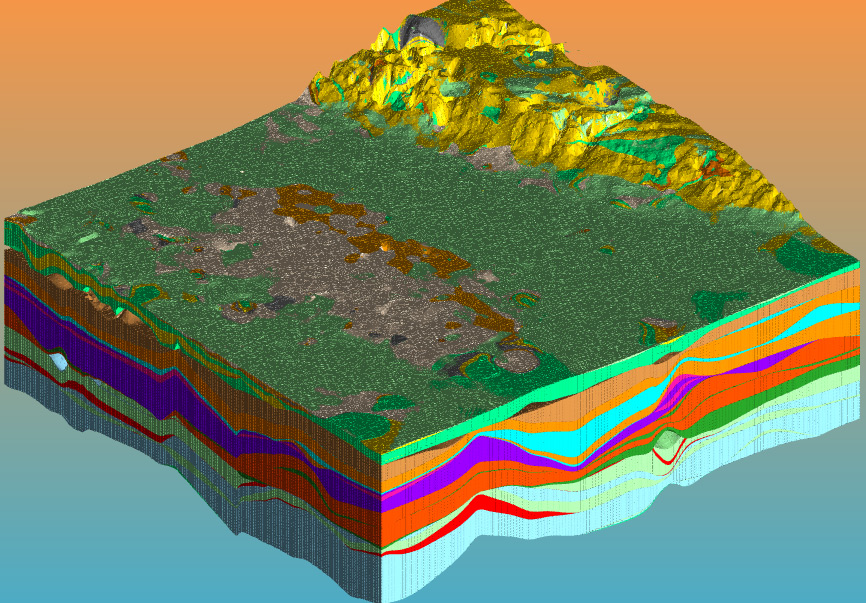

### Lets dive into real demo of the Mini Project

In [1]:
# importing necessary libraries
import pandas as pd
import numpy as np
import gempy as gp
import matplotlib.image as mpimg
%matplotlib qt5

WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


In [2]:
# creating model
geo_model = gp.create_model('First_Model')


In [3]:
# Assign given grid parameters 
geo_model = gp.init_data(geo_model,
                         extent= [0, 100.0, 0, 100.0, 0, 50.0], 
                         resolution=[50, 50, 50])      


Active grids: ['regular']


In [4]:
# Initialize 2d plots
p2d = gp.plot_2d(geo_model, section_names=None,
                 direction=None, cell_number=None)
# In this case perpendicular to the y axes
ax = p2d.add_section(cell_number=1, direction='y')

In [5]:
# Setting default surfaces
geo_model.set_default_surfaces()

,surface,series,order_surfaces,color,id
0,surface1,Default series,1,#015482,1
1,surface2,Default series,2,#9f0052,2


In [6]:
# Add 3 points on the default surface
geo_model.add_surface_points(X=20, Y=0, Z=15, surface='surface1', idx=0)
geo_model.add_surface_points(X=35, Y=0, Z=30, surface='surface1', idx=1)
geo_model.add_surface_points(X=30, Y=0, Z=10, surface='surface1', idx=2)
p2d.plot_data(ax)

In [7]:
# Adding orientation
geo_model.add_orientations(X=20, Y=0, Z=20, surface='surface1',
                           pole_vector= (0,0,1))
geo_model.add_orientations(X=60, Y=0, Z=40, surface='surface1',
                           pole_vector= (0,0,1))
p2d.plot_data(ax)

In [8]:
geo_model.surface_points

,X,Y,Z,smooth,surface
0,20.0,0.0,15.0,0.000001,surface1
1,35.0,0.0,30.0,0.000001,surface1
2,30.0,0.0,10.0,0.000001,surface1


In [9]:
# Setting the interpolator
gp.set_interpolator(
    geo_model,
    output=['geology'], 
    theano_optimizer='fast_compile')                      

Setting kriging parameters to their default values.
Compiling theano function...


WARNING (theano.gof.compilelock): Overriding existing lock by dead process '15812' (I am process '4552')


Level of Optimization:  fast_compile
Device:  cpu
Precision:  float64
Number of faults:  0
Compilation Done!
Kriging values: 
                      values
range                 150.0
$C_o$            535.714286
drift equations         [3]


In [10]:
gp.compute_model(geo_model)


Lithology ids 
  [2. 2. 2. ... 1. 1. 1.] 

In [11]:
# In 2D
p2d.plot_contacts(ax)


In [12]:
# In 3D
p3d = gp.plot_3d(geo_model, image=False)
p3d.plot_surfaces()
p3d.plot_structured_grid()
p3d.plot_data()

C:\Users\MANEET\Anaconda3\envs\gempy\lib\site-packages\pyvista\plotting\plotting.py:1354: PyvistaDeprecationWarning: 
"stitle" is a depreciated keyword and will be removed in a future
release.

Use ``scalar_bar_args`` instead.  For example:

scalar_bar_args={'title': 'Scalar Bar Title'}

  warnings.warn(USE_SCALAR_BAR_ARGS, PyvistaDeprecationWarning)
C:\Users\MANEET\Anaconda3\envs\gempy\lib\site-packages\pyvista\plotting\plotting.py:1354: PyvistaDeprecationWarning: 
"stitle" is a depreciated keyword and will be removed in a future
release.

Use ``scalar_bar_args`` instead.  For example:

scalar_bar_args={'title': 'Scalar Bar Title'}

  warnings.warn(USE_SCALAR_BAR_ARGS, PyvistaDeprecationWarning)


In [13]:
geo_model.grid

Grid Object. Values: 
array([[ 1. ,  1. ,  0.5],
       [ 1. ,  1. ,  1.5],
       [ 1. ,  1. ,  2.5],
       ...,
       [99. , 99. , 47.5],
       [99. , 99. , 48.5],
       [99. , 99. , 49.5]])

In [14]:
geo_model.surfaces.df

,surface,series,order_surfaces,isBasement,isFault,isActive,hasData,color,vertices,edges,sfai,id
0,surface1,Default series,1,False,False,True,True,#015482,"[[1.0, 1.0, 15.825628280639648], [1.0, 3.0, 15...","[[2, 1, 0], [3, 1, 2], [3, 4, 1], [5, 4, 3], [...",0.432561,1
1,surface2,Default series,2,True,False,True,True,#9f0052,NaN,NaN,NaN,2


In [15]:
gp.save_model(geo_model)

True

# Thank You